In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

df = pd.read_csv("~/Documents/clean_coaster_full.csv")
df = df.fillna('M')

In [26]:
pd.set_option('display.max_rows', 10)
df

,coaster_name,Length,Location,Status,Manufacturer,Model,Height,launch_system,Duration,year_introduced,Type_Main,speed_mph,Inversions_clean,Gforce_clean,coaster_rating
0,10 Inversion Roller Coaster,2788.8,Chimelong Paradise,Operating,Intamin,Looping Coaster,98.4,Other,92.0,2006,Steel,45.0,10,M,49.4
1,Abyss,2070.0,Adventure World,Operating,Gerstlauer,Euro-Fighter,98.0,Chain Lift,120.0,2013,Steel,52.8,3,4.5,64.1
2,Abyssus,4317.6,Energylandia,Operating,Vekoma,Other,126.3,LSM Launch,M,2021,Steel,62.1,4,4.5,91.7
3,Accelerator,590.0,Drayton Manor Theme Park,Operating,Vekoma,Family Coaster,66.0,Other,M,2011,Steel,37.3,0,3.0,41.8
4,Acrobat,3349.8,Nagashima Spa Land,Operating,Bolliger & Mabillard,Other,141.1,Chain Lift,180.0,2015,Steel,55.9,4,M,88.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,Zadra,4318.0,Energylandia,Operating,Rocky Mountain Construction,Other,206.0,Chain Lift,110.0,2019,Other,75.2,3,4.0,99.7
896,Zeus,2900.0,Mt. Olympus Water & Theme Park,Operating,Custom Coasters International,Other,90.0,Other,85.0,1997,Wood,60.0,0,M,72.7
897,Zippin Pippin,2865.0,Bay Beach,Operating,The Gravity Group,Wooden Out and Back,70.0,Chain Lift,118.0,1912,Wood,40.0,0,M,79.2
898,Zoomerang,935.0,Lake Compounce,Operating,Vekoma,Boomerang,116.5,Other,108.0,1997,Steel,47.0,3,5.2,14.9


In [27]:
import numpy as np

variables = {
    'Length': [0, 1000, 2000, 3000, 3500, 4500, np.inf],
    'Height': [0, 50, 75, 100, 125, 175, 225, np.inf],
    'Duration': [0, 49, 69, 89, 109, 139, 159, np.inf],
    'speed_mph': [0, 31, 39, 49, 59, 69, np.inf],  
    'Gforce_clean': [0, 2.6, 3.49, 3.99, 4.49, 4.99, np.inf]
}

labels_dict = {
    'Length': ['0-1000', '1000-2000', '2000-3000', '3000-3500', '3500-4500', '4500+'],
    'Height': ['0-50', '50-75', '75-100', '100-125', '125-175', '175-225', '225+'],
    'Duration': ['0-49', '49-69', '69-89', '89-109', '109-139', '139-159', '159+'],
    'speed_mph': ['0-31', '31-39', '39-49', '49-59', '59-69', '69+'],
    'Gforce_clean': ['0-2.6', '2.6-3.49', '3.49-3.99', '3.99-4.49', '4.49-4.99', '5+']
}

def bin_variable_custom(df, variable, bins, labels):
    df[variable] = pd.to_numeric(df[variable], errors='coerce')
    
    df[variable] = pd.cut(df[variable], bins=bins, labels=labels, include_lowest=True, right=False)
    return df

for var, bins in variables.items():
    if var in df.columns:  
        df = bin_variable_custom(df, var, bins, labels_dict[var])
    else:
        print(f"Warning: Column '{var}' not found in the DataFrame") 

In [28]:
def bin_inversions(df, variable):
    df[variable] = pd.to_numeric(df[variable], errors='coerce')
    bins = [0, 1, 2, 4, 5, np.inf]
    labels = ['0', '1', '2', '3-4', '5+']
    df[variable] = pd.cut(df[variable], bins=bins, labels=labels, right=False)
    return df

df = bin_inversions(df, 'Inversions_clean')

df

,coaster_name,Length,Location,Status,Manufacturer,Model,Height,launch_system,Duration,year_introduced,Type_Main,speed_mph,Inversions_clean,Gforce_clean,coaster_rating
0,10 Inversion Roller Coaster,2000-3000,Chimelong Paradise,Operating,Intamin,Looping Coaster,75-100,Other,89-109,2006,Steel,39-49,5+,NaN,49.4
1,Abyss,2000-3000,Adventure World,Operating,Gerstlauer,Euro-Fighter,75-100,Chain Lift,109-139,2013,Steel,49-59,2,4.49-4.99,64.1
2,Abyssus,3500-4500,Energylandia,Operating,Vekoma,Other,125-175,LSM Launch,NaN,2021,Steel,59-69,3-4,4.49-4.99,91.7
3,Accelerator,0-1000,Drayton Manor Theme Park,Operating,Vekoma,Family Coaster,50-75,Other,NaN,2011,Steel,31-39,0,2.6-3.49,41.8
4,Acrobat,3000-3500,Nagashima Spa Land,Operating,Bolliger & Mabillard,Other,125-175,Chain Lift,159+,2015,Steel,49-59,3-4,NaN,88.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,Zadra,3500-4500,Energylandia,Operating,Rocky Mountain Construction,Other,175-225,Chain Lift,109-139,2019,Other,69+,2,3.99-4.49,99.7
896,Zeus,2000-3000,Mt. Olympus Water & Theme Park,Operating,Custom Coasters International,Other,75-100,Other,69-89,1997,Wood,59-69,0,NaN,72.7
897,Zippin Pippin,2000-3000,Bay Beach,Operating,The Gravity Group,Wooden Out and Back,50-75,Chain Lift,109-139,1912,Wood,39-49,0,NaN,79.2
898,Zoomerang,0-1000,Lake Compounce,Operating,Vekoma,Boomerang,100-125,Other,89-109,1997,Steel,39-49,2,5+,14.9


In [29]:
# Add 'M' category and fill missing values for each column in sequence
for column in ['Height', 'Duration', 'Length', 'speed_mph', 'Inversions_clean', 'Gforce_clean']:
    df[column] = df[column].cat.add_categories('M')
    df[column] = df[column].fillna('M')


In [30]:
df

,coaster_name,Length,Location,Status,Manufacturer,Model,Height,launch_system,Duration,year_introduced,Type_Main,speed_mph,Inversions_clean,Gforce_clean,coaster_rating
0,10 Inversion Roller Coaster,2000-3000,Chimelong Paradise,Operating,Intamin,Looping Coaster,75-100,Other,89-109,2006,Steel,39-49,5+,M,49.4
1,Abyss,2000-3000,Adventure World,Operating,Gerstlauer,Euro-Fighter,75-100,Chain Lift,109-139,2013,Steel,49-59,2,4.49-4.99,64.1
2,Abyssus,3500-4500,Energylandia,Operating,Vekoma,Other,125-175,LSM Launch,M,2021,Steel,59-69,3-4,4.49-4.99,91.7
3,Accelerator,0-1000,Drayton Manor Theme Park,Operating,Vekoma,Family Coaster,50-75,Other,M,2011,Steel,31-39,0,2.6-3.49,41.8
4,Acrobat,3000-3500,Nagashima Spa Land,Operating,Bolliger & Mabillard,Other,125-175,Chain Lift,159+,2015,Steel,49-59,3-4,M,88.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,Zadra,3500-4500,Energylandia,Operating,Rocky Mountain Construction,Other,175-225,Chain Lift,109-139,2019,Other,69+,2,3.99-4.49,99.7
896,Zeus,2000-3000,Mt. Olympus Water & Theme Park,Operating,Custom Coasters International,Other,75-100,Other,69-89,1997,Wood,59-69,0,M,72.7
897,Zippin Pippin,2000-3000,Bay Beach,Operating,The Gravity Group,Wooden Out and Back,50-75,Chain Lift,109-139,1912,Wood,39-49,0,M,79.2
898,Zoomerang,0-1000,Lake Compounce,Operating,Vekoma,Boomerang,100-125,Other,89-109,1997,Steel,39-49,2,5+,14.9


In [31]:
coaster_names = df['coaster_name']  
df = df.drop('coaster_name', axis=1) 

In [32]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

df = pd.get_dummies(df, columns=categorical_columns)

In [33]:
# Separating Training and Testing data (80% train, 20% test)
train, valid = train_test_split(df, train_size=0.8, random_state=590389)

# Splitting the validation set into validation (10%) and test (10%)
valid, test = train_test_split(valid, test_size=0.5, random_state=590389)

In [34]:
X_train = train.drop(["coaster_rating"], axis = 1)
y_train = train["coaster_rating"]

X_valid = valid.drop(["coaster_rating"], axis = 1)
y_valid = valid["coaster_rating"]

X_test = test.drop(["coaster_rating"], axis=1)
y_test = test["coaster_rating"]

In [35]:
from xgboost import XGBRegressor

xgb_coaster = XGBRegressor(n_estimators = 50,
                            subsample = 0.5,
                            random_state = 12345)

xgb_coaster.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=12345, ...)

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'eta': [0.1, 0.2, 0.3, 0.4],
    'max_depth': [2, 4, 6, 8, 10],
    'subsample': [0.25, 0.5, 0.75, 1]
}

xgb = XGBRegressor()

grid_search = GridSearchCV(estimator = xgb, param_grid = param_grid, cv = 10)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'eta': [0.1, 0.2, 0.3, 0.4],
                         'max_depth': [2, 4, 6, 8, 10],
                         'n_estimators': [50, 100, 150, 200, 250],
                         'subsample': [0.25, 0.5, 0.75, 1]})

In [39]:
grid_search.best_params_

{'eta': 0.1, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.5}

In [40]:
xgb_coaster = XGBRegressor(n_estimators = 100,
                        subsample = 0.5,
                        eta = 0.1,
                        max_depth = 6,
                        random_state = 12345)

xgb_coaster.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

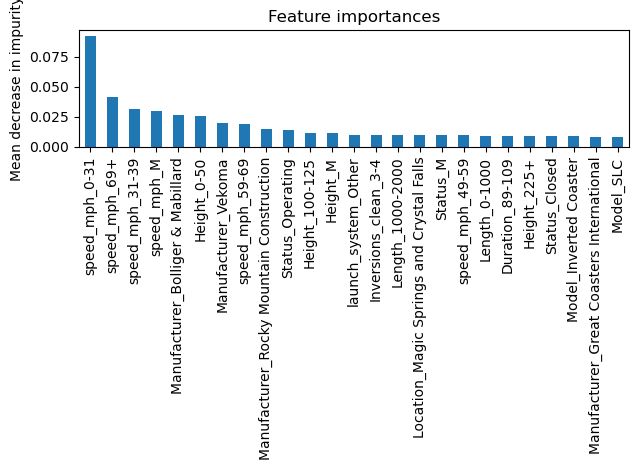

In [41]:
forest_importances = pd.Series(xgb_coaster.feature_importances_, index = xgb_coaster.feature_names_in_)

top_25_importances = forest_importances.sort_values(ascending=False).head(25)

fig, ax = plt.subplots()
top_25_importances.plot.bar(ax = ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

plt.show()

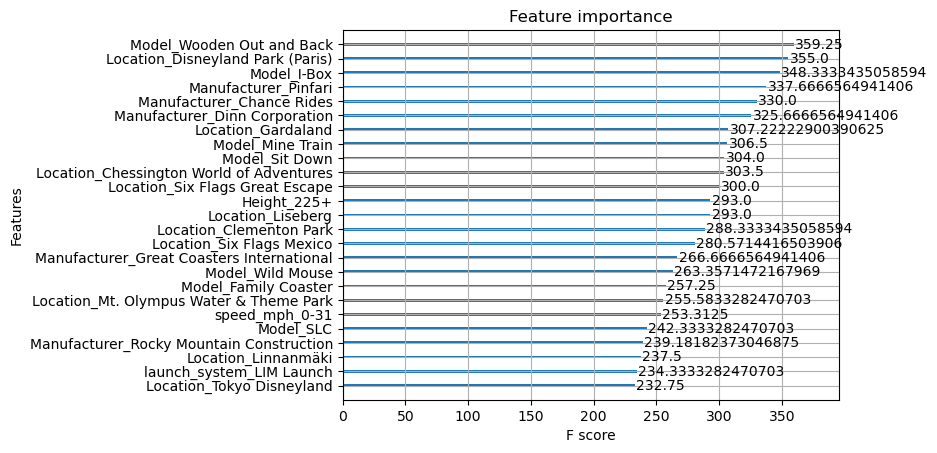

In [42]:
import xgboost

xgboost.plot_importance(xgb_coaster, importance_type = 'cover', max_num_features = 25)

plt.show()

In [18]:
import numpy as np

X_train_r = X_train

X_train_r['random'] = np.random.normal(0, 1, 720)

In [19]:
xgb_coaster = XGBRegressor(n_estimators = 100,
                        subsample = 0.5,
                        eta = 0.1,
                        max_depth = 6,
                        random_state = 12345)

xgb_coaster.fit(X_train_r, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

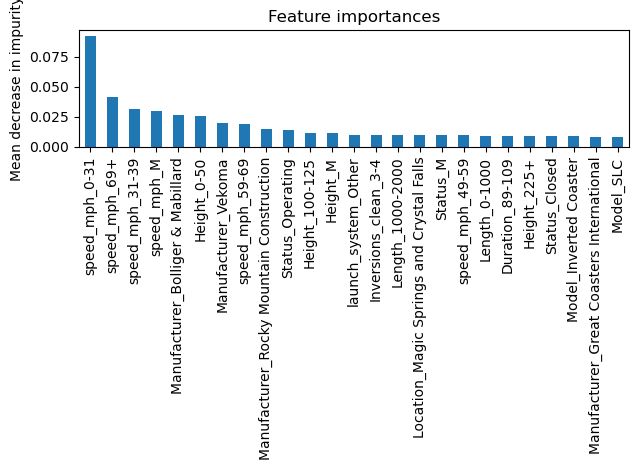

In [43]:
forest_importances = pd.Series(xgb_coaster.feature_importances_, index = xgb_coaster.feature_names_in_)

top_25_importances = forest_importances.sort_values(ascending=False).head(25)

fig, ax = plt.subplots()
top_25_importances.plot.bar(ax = ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

plt.show()

In [21]:
# Get the rank of "randoM" in the sorted importances
if "random" in forest_importances.index:
    rank = forest_importances.index.get_loc("random") + 1  # Adding 1 for 1-based rank
    print(f"Variable 'random' is ranked #{rank} in importance.")
else:
    print("Variable 'random' is not in the top importances.")


Variable 'random' is ranked #270 in importance.


In [54]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# Make predictions on the training set
y_train_pred = xgb_coaster.predict(X_train) # , cv = 10
# train_full['predictions'] = y_train_pred_cv

# Calculate the Mean Absolute Error (MAE)
mae_train_cv = mean_absolute_error(y_train, y_train_pred)

# Calculate MAPE for training data
mape_train_cv = mean_absolute_percentage_error(y_train, y_train_pred)

# Print the MAE for the training data
print("MAE for Training data:", mae_train_cv)

# Print the MAPE
print("MAPE for Training Data: ", mape_train_cv)

MAE for Training data: 6.122220959928301
MAPE for Training Data:  0.25107728780577104


In [57]:
y_train_pred
y_valid_pred
y_test_pred

array([ 29.383831,  20.205183,  46.02521 ,  87.886406,  62.2834  ,
        83.99422 ,  25.13514 ,  30.942434,  58.708294,  18.610958,
        43.140724,  11.347038,  31.678936,  22.893618,  34.690613,
        60.24442 ,  72.61063 ,  78.34508 ,  67.985886,  60.471004,
        98.44965 ,  60.151264,  64.37121 ,  92.18213 ,  57.769497,
        30.272934,  62.671165,  37.875134,  46.1051  ,  84.31226 ,
        32.80002 ,  71.14152 ,  86.50386 ,  87.11249 ,  36.025043,
        67.95059 ,  60.32066 ,  98.82486 , 103.48436 ,  21.846294,
        21.975616,  25.47454 ,  16.898876,  25.73874 ,  44.802567,
        40.16576 ,  88.75271 ,  35.75633 ,  32.591843,  71.372795,
        19.992735,  38.80234 ,  11.748539,  48.046616,  88.95107 ,
        33.18845 ,  60.32066 ,  43.00625 ,  45.902023,  84.81239 ,
        42.66122 ,  30.536167,  66.51336 ,  31.552765,  61.248127,
        28.625797,  92.98452 ,  31.712519,  64.46423 ,  35.211536,
        65.20101 ,  26.695675,  89.862114,  59.610275,  47.201

In [44]:
y_valid_pred = xgb_coaster.predict(X_valid)

In [47]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [48]:
# Calculate the Mean Absolute Error (MAE) for validation data
mae_valid_cv = mean_absolute_error(y_valid, y_valid_pred)

# Calculate MAPE for validation data
mape_valid_cv = mean_absolute_percentage_error(y_valid, y_valid_pred)

# Print the MAE for the validation data
print("MAE for Validation data:", mae_valid_cv)

# Print the MAPE for the validation data
print("MAPE for Validation Data: ", mape_valid_cv)

MAE for Validation data: 11.844623790317112
MAPE for Validation Data:  0.3041972122401443


In [49]:
# Combine the training and validation sets
train_valid = pd.concat([train, valid], axis=0)

# Separate features and target for combined dataset
X_train_valid = train_valid.drop("coaster_rating", axis=1)
y_train_valid = train_valid["coaster_rating"]

In [50]:
xgb_coaster.fit(X_train_valid, y_train_valid)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [51]:
y_test_pred = xgb_coaster.predict(X_test)

In [52]:
# Calculate the Mean Absolute Error (MAE) for test data
mae_test_cv = mean_absolute_error(y_test, y_test_pred)

# Calculate MAPE for test data
mape_test_cv = mean_absolute_percentage_error(y_test, y_test_pred)

# Print the MAE for the test data
print("MAE for Test data:", mae_test_cv)

# Print the MAPE for the test data
print("MAPE for Test Data: ", mape_test_cv)

MAE for Test data: 12.18308620876736
MAPE for Test Data:  0.49066568111958025


In [53]:
import pandas as pd
import numpy as np

# Create a DataFrame with the actual and predicted values
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred
})
pd.set_option('display.max_rows', None)
# Display the DataFrame
print(comparison_df)

# Calculate the absolute percentage error for each row
comparison_df['APE'] = np.abs((comparison_df['Actual'] - comparison_df['Predicted']) / comparison_df['Actual']) * 100

# Calculate MAPE
mape = comparison_df['APE'].mean()

print(f"MAPE: {mape}")

     Actual   Predicted
269    13.6   29.383831
545    23.8   20.205183
866    78.7   46.025211
673    96.4   87.886406
14     24.2   62.283401
252    63.6   83.994217
159    44.1   25.135139
768     8.6   30.942434
871    56.2   58.708294
81      6.8   18.610958
127    18.5   43.140724
662     6.9   11.347038
336    53.3   31.678936
99     27.2   22.893618
101    22.2   34.690613
354    65.1   60.244419
604    76.7   72.610626
759    55.2   78.345078
128    81.1   67.985886
147    44.8   60.471004
816    99.8   98.449654
311    68.3   60.151264
381    47.4   64.371208
23     99.5   92.182129
182    69.7   57.769497
508    32.0   30.272934
116    63.7   62.671165
13     44.1   37.875134
337    74.3   46.105099
420    95.3   84.312263
118    69.1   32.800018
114    54.5   71.141518
453    95.1   86.503860
374    83.9   87.112488
380    43.9   36.025043
737    91.9   67.950592
732    57.4   60.320660
697    98.5   98.824860
392    99.1  103.484360
802    22.7   21.846294
235    15.0   21

In [60]:
y_train_pred_list = pd.Series(y_train_pred, index=y_train.index)
y_valid_pred_list = pd.Series(y_valid_pred, index=y_valid.index)
y_test_pred_list = pd.Series(y_test_pred, index=y_test.index)


In [65]:
df = pd.read_csv("~/Documents/clean_coaster_full.csv")
accuracy = df["coaster_name"]

In [ ]:
comparison_df = pd.concat([
    pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred_list}),
    pd.DataFrame({'Actual': y_valid, 'Predicted': y_valid_pred_list}),
    pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_list})
])

In [ ]:
comparison_df

In [67]:
# Join on index
comparison_df = comparison_df.join(coaster_names)

# Move coaster_name to the first column for clarity
comparison_df = comparison_df[['coaster_name', 'Actual', 'Predicted']]


             coaster_name  Actual  Predicted
819           Vild-Svinet    54.3  54.757534
56   Battlestar Galactica    86.8  81.314247
615         Soarin' Eagle     9.3  12.150001
149           Diamondback    93.4  95.115234
253         Ghost Chasers    19.6  25.933958


In [69]:
comparison_df = comparison_df.sort_values(by="Actual", ascending=False)

In [1]:
comparison_df['Closest'] = (comparison_df['Actual'] - comparison_df['Predicted']).abs()
comparison_df['Percent_Off'] = ((comparison_df['Actual'] - comparison_df['Predicted']).abs() / comparison_df['Actual']) * 100
comparison_df.head()

NameError: name 'comparison_df' is not defined

In [74]:
comparison_df.sort_values(by="Closest", ascending=True)

,coaster_name,Actual,Predicted,Closest
734,The Joker's Jinx,75.6,75.597717,0.002283
246,Gadget's Go Coaster,15.7,15.678567,0.021433
248,Galaxi,36.9,36.930988,0.030988
466,Orion,93.9,93.859962,0.040038
850,Wild Mouse,20.5,20.441250,0.058750
53,Batman: The Ride,60.4,60.320660,0.079340
778,Titan,59.6,59.519657,0.080343
88,Candymonium,92.5,92.617424,0.117424
870,Wonder Mountain's Guardian,39.5,39.375465,0.124535
792,Tron Lightcycle Power Run,86.5,86.626686,0.126686
